<a href="https://colab.research.google.com/github/dlawnghks/Self-study/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 30.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#형태소 = 언어에서 의미를 가진 최소의 단위

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# 분석할 텍스트
text = """
자연어 처리는 컴퓨터 과학과 인공지능의 한 분야로,
컴퓨터가 인간의 언어를 이해하고 해석할 수 있도록 하는 기술입니다.
텍스트 분석, 기계 번역, 감성 분석 등 다양한 응용 분야가 있습니다.
"""

# 형태소 분석기 초기화
okt = Okt()

# 텍스트를 명사 단위로 토큰화
tokens = okt.nouns(text)

# 단어의 빈도수 계산
word_counts = Counter(tokens)

# 결과 출력
print("단어 빈도수:")
for word, count in word_counts.most_common():
    print(f"{word}: {count}")


단어 빈도수:
컴퓨터: 2
분야: 2
분석: 2
자연어: 1
처리: 1
과학: 1
인공: 1
지능: 1
인간: 1
언어: 1
이해: 1
해석: 1
수: 1
기술: 1
텍스트: 1
기계: 1
번역: 1
감성: 1
등: 1
응용: 1


In [ ]:
from konlpy.tag import Okt
from collections import Counter

# 분석할 텍스트
text = input("분석할 텍스트를 입력하세요: ")

# 형태소 분석기 초기화
okt = Okt()

# 텍스트를 명사 단위로 토큰화
tokens = okt.nouns(text)

# 단어의 빈도수 계산
word_counts = Counter(tokens)

# 결과 출력
print("단어 빈도수:")
for word, count in word_counts.most_common():
    print(f"{word}: {count}")


분석할 텍스트를 입력하세요: 안녕하세요 반가워요
단어 빈도수:


In [ ]:
from konlpy.tag import Okt
from collections import Counter

# 사용자가 입력한 텍스트 받기
text = input("분석할 문장을 입력하세요: ")

# 형태소 분석기 초기화
okt = Okt()

# 텍스트를 형태소 단위로 분석
tokens_with_tags = okt.pos(text)

# 단어와 품사 분리
tokens = [word for word, tag in tokens_with_tags]
tags = {word: tag for word, tag in tokens_with_tags}

# 단어의 빈도수 계산
word_counts = Counter(tokens)

# 결과 출력
print("\n단어 빈도수 및 품사:")
for word, count in word_counts.most_common():
    print(f"{word} ({tags[word]}): {count}번")


분석할 문장을 입력하세요: 안녕하세요

단어 빈도수 및 품사:
안녕하세요 (Adjective): 1번


In [ ]:
from konlpy.tag import Okt
from collections import Counter


food_data = {
    "매콤하고 달달하다": "떡볶이",
    "달달하고 부드럽다": "케이크",
    "바삭하고 짭짤하다": "치킨",
    "고소하고 쫄깃하다": "김밥",
    "새콤달콤하다": "탕수육",
}

def predict_food(input_text):
    okt = Okt()
    tokens_with_tags = okt.pos(input_text)

    tokens = [word for word, tag in tokens_with_tags if tag in ["Adjective", "Noun"]]
    print(f"추출된 키워드: {tokens}")

    for features, food in food_data.items():
        feature_tokens = features.split()
        if any(token in feature_tokens for token in tokens):
            return food

    return "알 수 없는 음식"

text = input("음식의 특징을 입력하세요: ")
predicted_food = predict_food(text)
print(f"예측된 음식: {predicted_food}")


음식의 특징을 입력하세요: 매콤해요
추출된 키워드: ['매콤']
예측된 음식: 알 수 없는 음식


데이터 추가 및 성능 개선 필요

In [ ]:
!pip install kiwipiepy
from kiwipiepy import Kiwi
kiwi = Kiwi()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.4 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.20.0-py3-none-any.whl size=34818026 sha256=58b7d9e59aa4cb28ef554828fd01e844374ad651fa012292290941fc8613a3c5
  Stored in directory: /root/.cache/pip/wheels/b6/b1/66/2be9840f8ef3627d63d93503d81a5e3b41e9498dcb63b00b13
Successfully built kiwipiepy_model


In [ ]:
text = "이것은 한글 형태소 분석 키위 분석기입니다."
tokens = kiwi.tokenize(text)

In [ ]:
nouns = []
for token in kiwi.tokenize(text):
    if 'NN' in token.tag:
        nouns.append(token.form)

키위 형태소 분석기 한글 분석을 위해 공부

In [ ]:
!pip install kiwipiepy
from kiwipiepy import Kiwi

In [ ]:
kiwi = Kiwi()

text = input("분석할 텍스트를 입력하세요: ")

tokens = kiwi.analyze(text) #형태소를 단위로 나눔
print("\n[1] 형태소 분석 결과:")
for token in tokens[0][0]:
    print(f"{token[0]} ({token[1]})")

stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '과', '와']  #불용어 제거
filtered_tokens = [token[0] for token in tokens[0][0] if token[0] not in stopwords]
print("\n[2] 불용어 제거 후:")
print(filtered_tokens)

nouns = [token[0] for token in tokens[0][0] if token[1] in ['NNG', 'NNP']]
print("\n[3] 텍스트에서 추출된 명사:")
print(nouns)

unique_words = sorted(set(filtered_tokens))
print("\n[4] 중복 제거된 단어 리스트:")
print(unique_words)

분석할 텍스트를 입력하세요: 자연어 처리는 인공지능의 한 분야로, 사람의 언어를 이해하고 처리하는 기술입니다.

[1] 형태소 분석 결과:
자연어 처리 (NNP)
는 (JX)
인공 (NNG)
지능 (NNG)
의 (JKG)
한 (MM)
분야 (NNG)
로 (JKB)
, (SP)
사람 (NNG)
의 (JKG)
언어 (NNG)
를 (JKO)
이해 (NNG)
하 (XSV)
고 (EC)
처리 (NNG)
하 (XSV)
는 (ETM)
기술 (NNG)
이 (VCP)
ᆸ니다 (EF)
. (SF)

[2] 불용어 제거 후:
['자연어 처리', '인공', '지능', '한', '분야', '로', ',', '사람', '언어', '이해', '하', '고', '처리', '하', '기술', 'ᆸ니다', '.']

[3] 텍스트에서 추출된 명사:
['자연어 처리', '인공', '지능', '분야', '사람', '언어', '이해', '처리', '기술']

[4] 중복 제거된 단어 리스트:
[',', '.', 'ᆸ니다', '고', '기술', '로', '분야', '사람', '언어', '이해', '인공', '자연어 처리', '지능', '처리', '하', '한']


불용어 제거,키위 형태소로 코드 만들어 공부

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

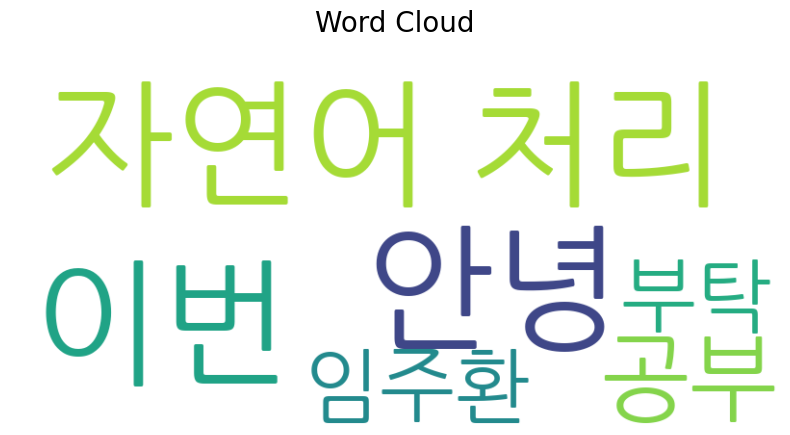

In [ ]:
!pip install kiwipiepy wordcloud matplotlib
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

kiwi = Kiwi()

text = input("분석할 텍스트를 입력하세요: ")

#형태소 분석 및 명사 추출
tokens = kiwi.analyze(text)
nouns = [token[0] for token in tokens[0][0] if token[1] in ['NNG', 'NNP']]  # 명사만 추출

# 명사 빈도수 계산
nouns_count = Counter(nouns)

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(nouns_count)

#워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title("Word Cloud", fontsize=20)
plt.show()


한글 워드 클라우드 생성

In [1]:
import numpy as np

In [9]:
a = np.array([1, 2])
b = np.array([2, 2])
c = np.array([-3, -3])

In [3]:
a.shape

(2,)

In [4]:
len(a)

2

In [5]:
np.linalg.norm(a)

2.23606797749979

In [11]:
np.linalg.norm(b-a)
np.linalg.norm(c-a)

6.4031242374328485

In [12]:
import scipy.spatial.distance as dst

In [13]:
dst.cityblock(a,b)

1

In [15]:
np.linalg.norm(c-a,2)

6.4031242374328485

In [16]:
dst.euclidean(a,b)

1.0

In [17]:
d = np.array([1,0,0])
e = np.array([1,1,0])
dst.jaccard(d,e)

0.5

In [18]:
dst.hamming(d,e)

0.3333333333333333

In [19]:
np.dot(a,b)

6

In [27]:
Doc1 = 'banana apple apple eggplant'
Doc2 = 'orange carrot banana eggplant'
Doc3 = 'apple carrot banana banana'
Doc4 = 'orange banana grape'

In [28]:
TEXT = [
    'banana apple apple eggplant'
    'orange carrot banana eggplant'
    'apple carrot banana banana'
    'orange banana grape'
]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
tf_vectorizer = CountVectorizer(min_df=1, max_df=1.0, ngram_range=(1,1))

In [37]:
tf_features = tf_vectorizer.fit_transform(TEXT)

In [38]:
print(tf_features)

  (0, 1)	4
  (0, 0)	2
  (0, 5)	1
  (0, 3)	2
  (0, 4)	1
  (0, 2)	1
  (0, 6)	1


In [40]:
features = tf_features.todense()

In [41]:
features

matrix([[2, 4, 1, 2, 1, 1, 1]])

In [43]:
features_names = tf_vectorizer.get_feature_names_out()

In [44]:
print(features_names)

['apple' 'banana' 'bananaorange' 'carrot' 'eggplantapple' 'eggplantorange'
 'grape']


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=1, ngram_range=(1,1))

In [49]:
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

In [50]:
print(tfidf_features)

  (0, 1)	0.7559289460184544
  (0, 0)	0.3779644730092272
  (0, 5)	0.1889822365046136
  (0, 3)	0.3779644730092272
  (0, 4)	0.1889822365046136
  (0, 2)	0.1889822365046136
  (0, 6)	0.1889822365046136
